In [27]:
#import libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.cluster import KMeans

In [20]:
data = pd.read_csv("EastWestAirlines.csv")

In [21]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [22]:
data.shape

(3999, 12)

In [23]:
def norm_func(i):
    x=(i-i.min())/(i.max() - i.min())
    return x

In [24]:
df_norm = norm_func(data.iloc[:,1:])

In [25]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


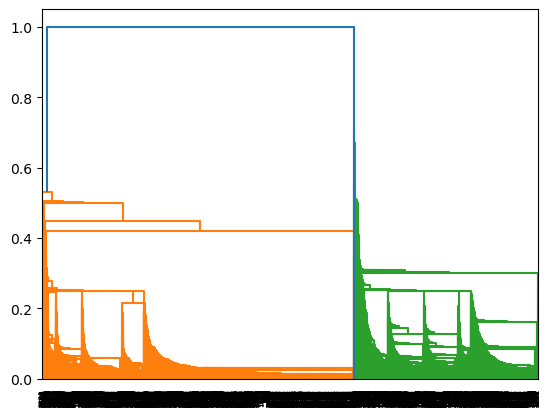

In [18]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

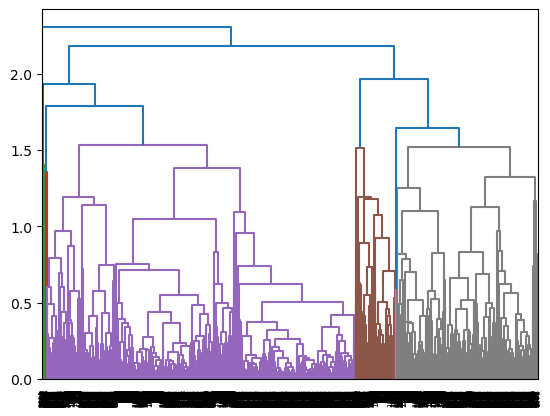

In [26]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [29]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='single')

In [30]:
hc.fit_predict(df_norm)

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
y_hc=hc.fit_predict(df_norm)

In [32]:
data['h_clusterid'] = y_hc

In [33]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [34]:
data.groupby(["h_clusterid"])['ID#'].apply(lambda x: tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
2                                              (3606,)
3                                              (2862,)
4                                               (915,)
Name: ID#, dtype: object

In [35]:
data[data['ID#'].isin([8,10,99,100,112,196])]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
96,99,57346,0,1,1,1,5560,23,0,0,6766,0,0
97,100,102062,0,4,1,1,44247,16,0,0,6758,0,0
109,112,15098,0,4,1,1,32917,26,550,3,6737,1,1
192,196,386061,0,5,1,1,107813,24,0,0,7500,1,1


# Another method For Hierarchical Clustering

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [37]:
xdist = pdist(df_norm, metric="euclidean")

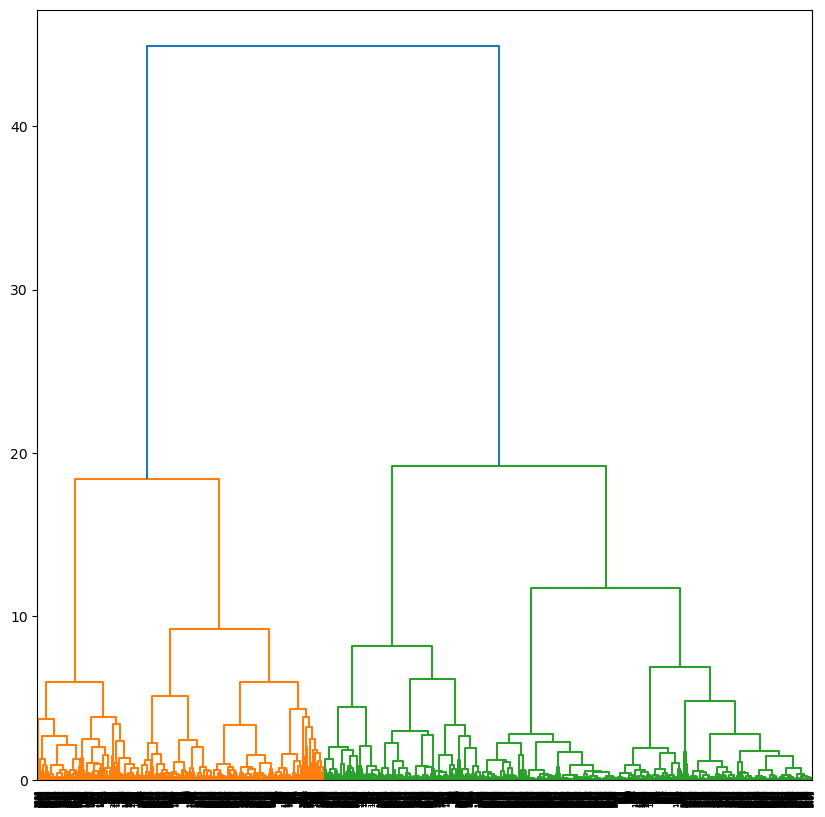

In [38]:
linked = linkage(xdist, 'ward')
plt.figure(figsize=(10,10))
dendrogram(linked,orientation='top', distance_sort ='decending', show_leaf_counts=True)
plt.show()

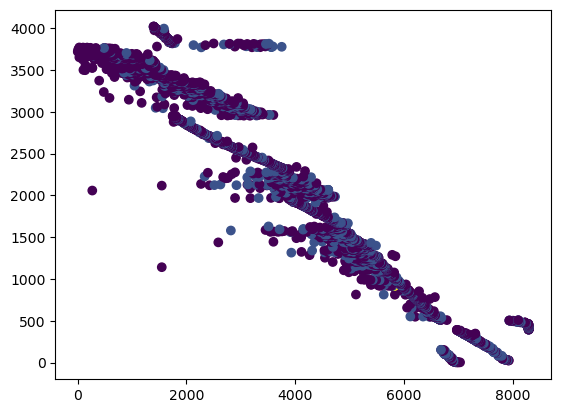

In [39]:
plt.scatter(data.iloc[:,-3],data.iloc[:,0],c=y_hc)

# Kmeans

In [42]:
mode1_kmeans = KMeans(n_clusters = 10)
airlines_scaled = mode1_kmeans.fit(df_norm)

In [43]:
mode1_kmeans.labels_

array([7, 7, 7, ..., 9, 5, 5], dtype=int32)

In [44]:
mode1 = pd.Series(mode1_kmeans.labels_)

In [46]:
data['labels']=pd.Series(mode1_kmeans.labels_)

In [47]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,7
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,7
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,7
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,7
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [49]:
data.groupby(['labels'])["ID#"].apply(lambda x: tuple(x))

labels
0    (5, 9, 10, 16, 17, 19, 20, 29, 36, 39, 42, 44,...
1    (814, 931, 932, 992, 993, 1093, 1104, 1109, 11...
2    (1315, 1580, 1591, 1592, 1594, 1629, 1800, 181...
3    (7, 31, 33, 45, 57, 59, 61, 68, 73, 74, 76, 78...
4    (1254, 1438, 1441, 1488, 1565, 1570, 1574, 158...
5    (1141, 1969, 2058, 2137, 2208, 2220, 2253, 227...
6    (8, 18, 22, 30, 37, 40, 43, 46, 48, 54, 58, 83...
7    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
8    (12, 21, 82, 88, 97, 103, 108, 124, 129, 150, ...
9    (1340, 1439, 1509, 1534, 1560, 1598, 1599, 173...
Name: ID#, dtype: object

In [50]:
mode1_kmeans.cluster_centers_

array([[ 5.61143867e-02,  1.93549253e-02,  6.38605442e-01,
         1.70068027e-03,  3.03576608e-18,  1.20552571e-01,
         2.18319886e-01,  1.93906358e-02,  3.41419587e-02,
         7.50224324e-01,  1.00000000e+00],
       [ 2.60292769e-02,  7.72978891e-03,  2.48493976e-02,
         1.35542169e-02,  1.12951807e-03,  1.33947874e-02,
         7.79805268e-02,  7.64232580e-03,  1.33837236e-02,
         5.04936251e-01, -3.88578059e-16],
       [ 3.69700816e-02,  2.01144879e-02,  3.89048991e-02,
         1.72910663e-02,  3.03576608e-18,  3.29730823e-02,
         1.18155620e-01,  3.35956454e-02,  5.72562667e-02,
         3.27767234e-01,  1.00000000e+00],
       [ 8.11239721e-02,  4.90883425e-03,  6.77631579e-01,
         9.54097912e-18,  6.57894737e-03,  1.29532684e-01,
         1.99778152e-01,  7.15087196e-03,  1.29096326e-02,
         7.32613462e-01, -3.33066907e-16],
       [ 5.79628888e-02,  9.49168381e-03,  6.13132911e-01,
         1.58227848e-03,  4.74683544e-03,  1.08656642e-01,
  

# INFRENCES

In [51]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'h_clusterid', 'labels'],
      dtype='object')

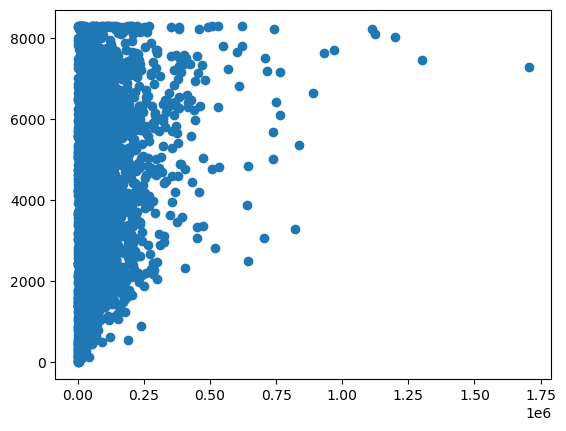

In [55]:
plt.scatter(data["Balance"],data['Days_since_enroll'], cmap=plt.cm.Accent)

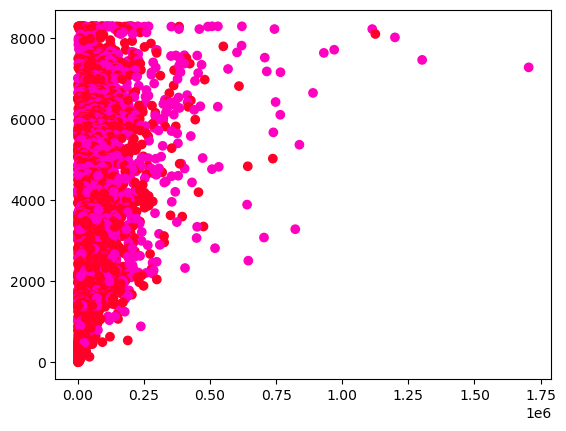

In [56]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'complete')
plt.scatter(data['Balance'], data['Days_since_enroll'], c=cluster.fit_predict(data.iloc[:,[1.-4]]), cmap=plt.cm.gist_rainbow)

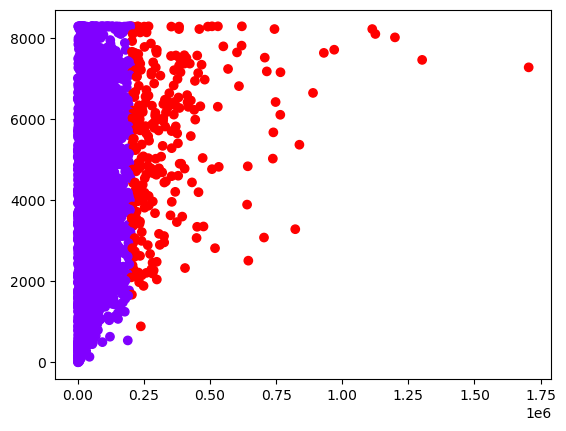

In [59]:
mode1 = KMeans(n_clusters = 2, max_iter=600, algorithm = 'auto')
mode1.fit(data.iloc[:,[1,-4]])
plt.scatter(data["Balance"], data["Days_since_enroll"], c=mode1.labels_,cmap=plt.cm.rainbow)

# DBSCAN

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

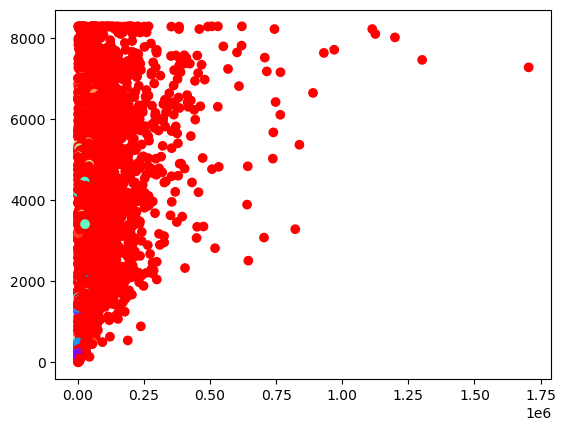

In [61]:
dbs=DBSCAN(min_samples=2,eps=0.2)
class_pr=dbs.fit_predict(data.iloc[:,1:5])
plt.scatter(data['Balance'], data['Days_since_enroll'],c=class_pr,cmap=plt.cm.rainbow_r)
plt.show()

# Finding the Optimal Number of Clusters

In [62]:
data1=pd.read_csv("EastWestAirlines.csv")
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [65]:
nc = [1,2,3,4,5,6,7,8,9]
iner = []
for i in nc:
    km=KMeans(i)
    km.fit(data1.iloc[:,[1,-2]])
    iner.append(km.inertia_)

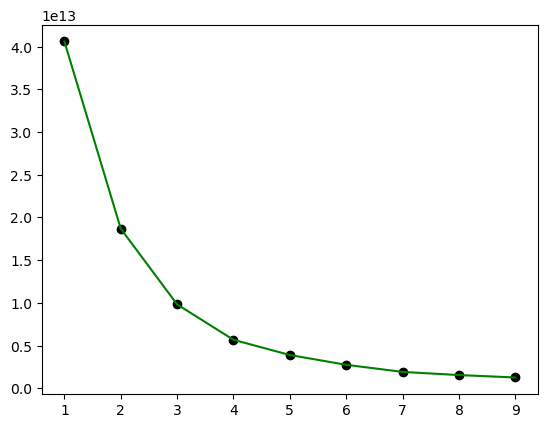

In [66]:
plt.plot(nc, iner,color='green')
plt.scatter(nc,iner,color='black')
plt.show()

# Silhouette score

In [70]:
from sklearn.metrics import silhouette_score as sil

In [71]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity ='euclidean', linkage= 'complete')
    y=hc.fit_predict(data1.iloc[:,[1,-2]])
    sc_score.append(sil(data1.iloc[:,[1,-2]],y))

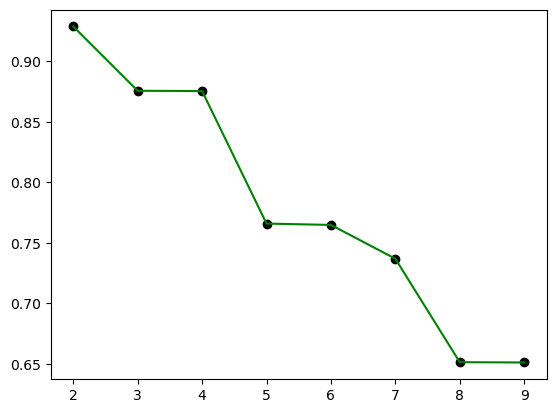

In [73]:
plt.plot(nc,sc_score,color='green')
plt.scatter(nc,sc_score,color='black')
plt.show()